In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# Считывание данных из файла
df = pd.read_csv('data.csv', decimal=',')
df.head()

,Y1,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
0,9.26,0.23,0.78,0.40,1.37,1.23,0.23,1.45,26006,167.69,47750,6.40,166.32,10.08,17.72
1,9.38,0.24,0.75,0.26,1.49,1.04,0.39,1.30,23935,186.10,50391,7.80,92.88,14.76,18.39
2,12.11,0.19,0.68,0.40,1.44,1.80,0.43,1.37,22589,220.45,43149,9.76,158.04,6.48,26.46
3,10.81,0.17,0.70,0.50,1.42,0.43,0.18,1.65,21220,169.30,41089,7.90,93.96,21.96,22.37
4,9.35,0.23,0.62,0.40,1.35,0.88,0.15,1.91,7394,39.53,14257,5.35,173.88,11.88,28.13


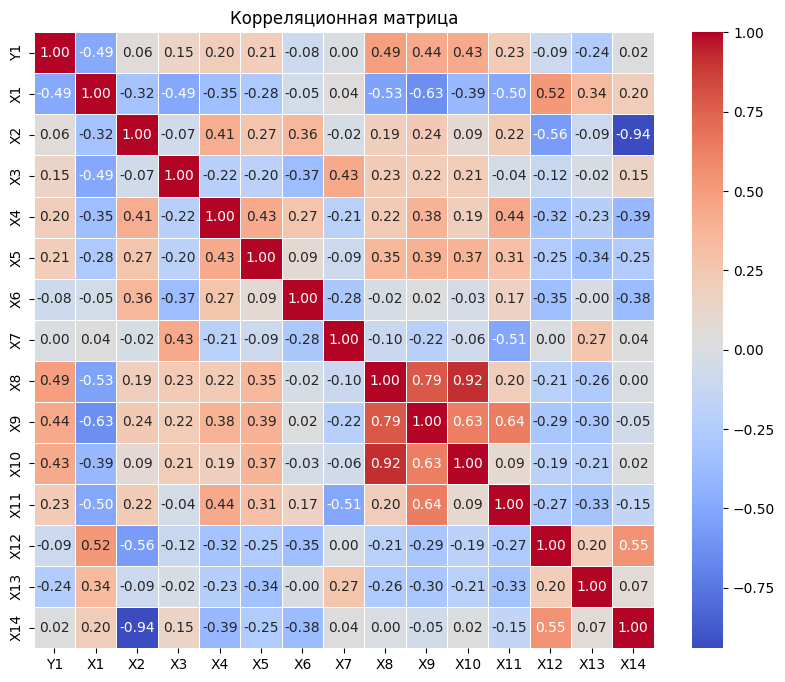

In [ ]:
# Расчёт корреляционной матрицы
correlation_matrix = df.corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

In [ ]:
correlation_matrix['Y1']

,Y1
Y1,1.000000
X1,-0.491147
X2,0.055718
X3,0.150958
X4,0.203438
X5,0.211123
X6,-0.082312
X7,0.000941
X8,0.485102
X9,0.438493


$$
\text{Из корреляционной матрицы видно, что в наибольшей степени Y1 коррелирует с X1 по абсолютной величине.}
$$

$$
\text{Оцениваем параметры функции регрессии } y = β_{0} + β_{1}*x_{1}
$$

Нахождение вектора оценок параметров регрессии:
$$
\hat{B} = K^{-1}Z,
$$

где:

$$
K = X^TX, \quad Z = X^TY,
$$

$$
X =
\begin{pmatrix}
1 & x_1^{(1)} & \cdots & x_k^{(1)} \\
1 & x_1^{(2)} & \cdots & x_k^{(2)} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_1^{(n)} & \cdots & x_k^{(n)}
\end{pmatrix}
=
\begin{pmatrix}
1 & \varphi_1(x_1) & \cdots & \varphi_k(x_1) \\
1 & \varphi_1(x_2) & \cdots & \varphi_k(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
1 & \varphi_1(x_n) & \cdots & \varphi_k(x_n)
\end{pmatrix}, \quad
Y =
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{pmatrix}
$$

In [ ]:
# Функция для нахождения оценки параметров уравнения множественной линейной регрессии
def mul_linear_reg_params(df, lst_of_var):
  n = len(df['Y1'])
  X_lin = np.ones((n, len(lst_of_var)+1))
  for i in range(n):
    for var_num in range(len(lst_of_var)):
      X_lin[i][1+var_num] = df[lst_of_var[var_num]][i]
  K_lin = X_lin.T @ X_lin
  Z_lin = X_lin.T @ df['Y1']
  res = np.linalg.inv(K_lin) @ Z_lin
  return res, K_lin

B_lin, K_lin = mul_linear_reg_params(df, ['X1']) # Вектор оценок параметров уравнения линейной регрессии
print(f'Уравнение линейной регрессии Y1 на X1: y = {round(B_lin[1], 2)}*x1 + {round(B_lin[0], 2)}')

Уравнение линейной регрессии Y1 на X1: y = -12.14*x1 + 11.65


$$
\text{Оценка остаточной дисперсии модели регрессии (несмещенная оценка дисперсии } \sigma^2\text{):}
$$

$$
s^2 = \frac{1}{n - k - 1} \sum_{i=1}^n (y_i - \hat{y}(x_i))^2
$$

$$
\text{Оценка коэффициента детерминации:}
$$

$$
\hat{R}^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}(x_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$

In [ ]:
# Оценка остаточной дисперсии модели линейной регрессии
est_res_var_lin_1 = sum([(df['Y1'][i] - (B_lin[1]*df['X1'][i] + B_lin[0]))**2 for i in range(len(df['Y1']))])/(len(df['Y1'])-2)

# Оценка коэффициента детерминации
est_coef_det_lin_1 = 1 - sum([(df['Y1'][i] - (B_lin[1]*df['X1'][i] + B_lin[0]))**2 for i in range(len(df['Y1']))])/sum([(df['Y1'][i] - sum(df['Y1'])/len(df['Y1']))**2 for i in range(len(df['Y1']))])

print(f'Оценка остаточной дисперсии модели линейной регрессии: {est_res_var_lin_1}')
print(f'Оценка коэффициента детерминации: {est_coef_det_lin_1}')

Оценка остаточной дисперсии модели линейной регрессии: 5.2622802276711464
Оценка коэффициента детерминации: 0.24122538238172586


Статистика Стьюдента

Для проверки значимости коэффициентов $\beta_j, j = 1, k$:

$t_j = \frac{\hat{\beta}_j}{\sqrt{s^2 [K^{-1}]_{jj}}}$, где $[K^{-1}]_{jj}$ - соответствующий диагональный элемент матрицы $K^{-1}$.

In [ ]:
t_1 = B_lin[1]/((est_res_var_lin_1*np.linalg.inv(K_lin)[1][1])**0.5)
print(f'Значение статистики Стьюдента: {t_1}')

Значение статистики Стьюдента: -4.026615792681766


$$
\text{При } \alpha = 0.05
$$

$$
\tau_{0,975} = 2{,}00758377
$$

$$
|t_{1}| = 4{,}0266 > \tau_{0,975}
$$

$$
\text{ => по критерию Cтьюдента принимается альтернативная гипотеза, коэффициент } \beta_{1} \text{ значим.}
$$

In [ ]:
# Находим вектор остатков для первой модели
residuals_vec_1 = pd.Series([(df['Y1'][i] - (B_lin[1]*df['X1'][i] + B_lin[0])) for i in range(len(df['Y1']))])
# Находим вектор корреляций остатка и других факторов
corr_res_1 = df.corrwith(residuals_vec_1).round(3)
corr_res_1

,0
Y1,0.871
X1,-0.000
X2,-0.118
X3,-0.106
X4,0.033
X5,0.086
X6,-0.122
X7,0.026
X8,0.260
X9,0.146


$$
\text{В наибольшей степени остаток первой модели коррелирует с X10. Добавляем фактор X10 в модель.}
$$
$$
\text{Оцениваем параметры функции регрессии } y = β_{0} + β_{1}*x_{1} + β_{2}*x_{10}
$$

In [ ]:
B_lin, K_lin = mul_linear_reg_params(df, ['X1', 'X10']) # Вектор оценок параметров уравнения линейной регрессии
print(f'Уравнение линейной регрессии Y1 на X1, X10: y = {round(B_lin[2], 5)}*x10 + {round(B_lin[1], 4)}*x1 + {round(B_lin[0], 4)}')

Уравнение линейной регрессии Y1 на X1, X10: y = 4e-05*x10 + -9.3765*x1 + 9.7499


In [ ]:
# Оценка остаточной дисперсии модели линейной регрессии
est_res_var_lin_2 = sum([(df['Y1'][i] - (B_lin[2]*df['X10'][i] + B_lin[1]*df['X1'][i] + B_lin[0]))**2 for i in range(len(df['Y1']))])/(len(df['Y1'])-3)

# Оценка коэффициента детерминации
est_coef_det_lin_2 = 1 - sum([(df['Y1'][i] - (B_lin[2]*df['X10'][i] + B_lin[1]*df['X1'][i] + B_lin[0]))**2 for i in range(len(df['Y1']))])/sum([(df['Y1'][i] - sum(df['Y1'])/len(df['Y1']))**2 for i in range(len(df['Y1']))])

print(f'Оценка остаточной дисперсии модели линейной регрессии: {est_res_var_lin_2}')
print(f'Оценка коэффициента детерминации: {est_coef_det_lin_2}')

Оценка остаточной дисперсии модели линейной регрессии: 4.874400631891077
Оценка коэффициента детерминации: 0.31093550526080016


In [ ]:
t_2 = B_lin[2]/((est_res_var_lin_2*np.linalg.inv(K_lin)[2][2])**0.5)
print(f'Значение статистики Стьюдента: {t_2}')

Значение статистики Стьюдента: 2.249070089780419


$$
\text{При } \alpha = 0.05
$$

$$
\tau_{0,975} = 2{,}00855
$$

$$
|t_{2}| = 2{,}24907 > \tau_{0,975}
$$

$$
\text{ => по критерию Cтьюдента принимается альтернативная гипотеза, коэффициент } \beta_{2} \text{ значим.}
$$

In [ ]:
# Находим вектор остатков для второй модели
residuals_vec_2 = pd.Series([(df['Y1'][i] - (B_lin[2]*df['X10'][i] + B_lin[1]*df['X1'][i] + B_lin[0])) for i in range(len(df['Y1']))])
# Находим вектор корреляций остатка и других факторов
corr_res_1 = df.corrwith(residuals_vec_2).round(3)
corr_res_1

,0
Y1,0.830
X1,-0.000
X2,-0.110
X3,-0.118
X4,0.016
X5,-0.001
X6,-0.112
X7,0.043
X8,0.026
X9,0.021


$$
\text{В наибольшей степени остаток второй модели коррелирует с X12. Добавляем фактор X12 в модель.}
$$
$$
\text{Оцениваем параметры функции регрессии } y = β_{0} + β_{1}*x_{1} + β_{2}*x_{10} + β_{3}*x_{12}
$$

In [ ]:
B_lin, K_lin = mul_linear_reg_params(df, ['X1', 'X10', 'X12']) # Вектор оценок параметров уравнения линейной регрессии
print(f'Уравнение линейной регрессии Y1 на X1, X10, X12: y = {round(B_lin[3], 4)}*x12 + {round(B_lin[2], 5)}*x10 + {round(B_lin[1], 4)}*x1 + {round(B_lin[0], 4)}')

Уравнение линейной регрессии Y1 на X1, X10, X12: y = 0.0162*x12 + 4e-05*x10 + -12.2291*x1 + 8.8544


In [ ]:
# Оценка остаточной дисперсии модели линейной регрессии
est_res_var_lin_3 = sum([(df['Y1'][i] - (B_lin[3]*df['X12'][i] + B_lin[2]*df['X10'][i] + B_lin[1]*df['X1'][i] + B_lin[0]))**2 for i in range(len(df['Y1']))])/(len(df['Y1'])-4)

# Оценка коэффициента детерминации
est_coef_det_lin_3 = 1 - sum([(df['Y1'][i] - (B_lin[3]*df['X12'][i] + B_lin[2]*df['X10'][i] + B_lin[1]*df['X1'][i] + B_lin[0]))**2 for i in range(len(df['Y1']))])/sum([(df['Y1'][i] - sum(df['Y1'])/len(df['Y1']))**2 for i in range(len(df['Y1']))])

print(f'Оценка остаточной дисперсии модели линейной регрессии: {est_res_var_lin_3}')
print(f'Оценка коэффициента детерминации: {est_coef_det_lin_3}')

Оценка остаточной дисперсии модели линейной регрессии: 4.720491661133507
Оценка коэффициента детерминации: 0.34603883059672014


In [ ]:
t_3 = B_lin[3]/((est_res_var_lin_3*np.linalg.inv(K_lin)[3][3])**0.5)
print(f'Значение статистики Стьюдента: {t_3}')

Значение статистики Стьюдента: 1.621795864626129


$$
\text{При } \alpha = 0.05
$$

$$
\tau_{0,975} = 2{,}0095
$$

$$
|t_{3}| = 1{,}621 < \tau_{0,975}
$$

$$
\text{ => по критерию Cтьюдента принимается нулевая гипотеза, коэффициент } \beta_{3} \text{ не значим.}
$$

$$
\text{Результирующая модель: }
Y1 = 0.00004*X10 + -9.3765*X1 + 9.7499
$$

$$
R^2 = 0.31
$$

Cтатистика Фишера:
$$
F = \frac{n - k - 1}{k} \frac{\sum_{i=1}^{n} (\hat{y}(x_i) - \bar{y})^2}{\sum_{i=1}^{n} (\hat{y}(x_i) - y_i)^2} = \frac{n - k - 1}{k} \frac{\hat{R}^2}{1 - \hat{R}^2}
$$

In [ ]:
# Расчёт статистики Фишера для модели
F_lin = ((len(df['Y1'])-3)/2)*(est_coef_det_lin_2/(1-est_coef_det_lin_2))
F_lin

np.float64(11.281074109705958)

In [ ]:
# Расчет уровня значимости коэффициентов модели
B_lin, K_lin = mul_linear_reg_params(df, ['X1', 'X10'])
t_0 = B_lin[0]/((est_res_var_lin_2*np.linalg.inv(K_lin)[0][0])**0.5)
print(f'Значение статистики Стьюдента для beta_0: {t_0}')
t_1 = B_lin[1]/((est_res_var_lin_2*np.linalg.inv(K_lin)[1][1])**0.5)
print(f'Значение статистики Стьюдента для beta_1: {t_1}')
t_2 = B_lin[2]/((est_res_var_lin_2*np.linalg.inv(K_lin)[2][2])**0.5)
print(f'Значение статистики Стьюдента для beta_2: {t_2}')

Значение статистики Стьюдента для beta_0: 7.774193343357137
Значение статистики Стьюдента для beta_1: -2.9742728888930343
Значение статистики Стьюдента для beta_2: 2.249070089780419


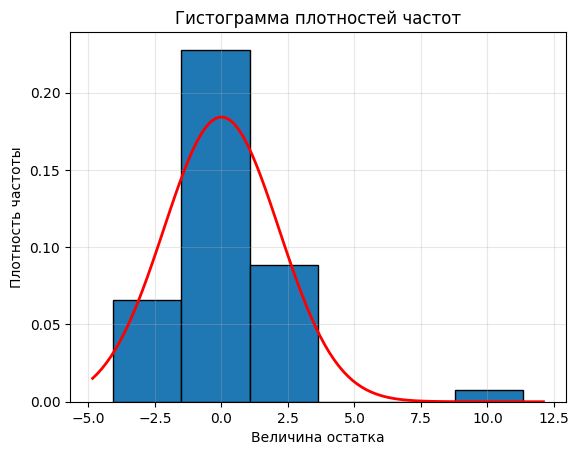

In [ ]:
# Исследование свойств остатков модели линейной регрессии
residuals_vec = [(df['Y1'][i] - (B_lin[2]*df['X10'][i] + B_lin[1]*df['X1'][i] + B_lin[0])) for i in range(len(df['Y1']))]

# Найдем оценки параметров нормального распределения
res_mean = sum(residuals_vec)/len(residuals_vec)
res_disp = sum([(residuals_vec[i] - res_mean)**2 for i in range(len(residuals_vec))])/(len(residuals_vec)-1)

# Построение гистограммы
plt.hist(residuals_vec, bins=int(1 + np.log2(len(residuals_vec))), density=True, edgecolor='black')
plt.title('Гистограмма плотностей частот')
plt.xlabel('Величина остатка')
plt.ylabel('Плотность частоты')
plt.grid(True, alpha=0.3)

# Наложение графика плотности нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, res_mean, res_disp**0.5)
plt.plot(x, p, 'r', linewidth=2)

Визуально гистограмма остатков хорошо согласуется с кривой плотности нормального распределения.

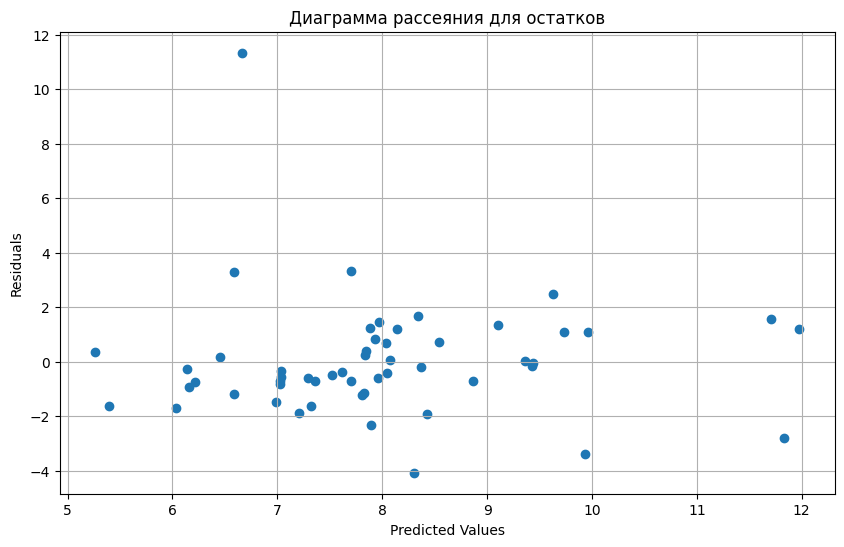

In [ ]:
# Исследование однородности остатков (гомоскедастичности)
# Отображение диаграммы рассеяния
predicted_values = [(B_lin[2]*df['X10'][i] + B_lin[1]*df['X1'][i] + B_lin[0]) for i in range(len(df['Y1']))]
plt.figure(figsize=(10, 6))
plt.scatter(predicted_values, residuals_vec)
plt.title('Диаграмма рассеяния для остатков')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)

Из приведенной диаграммы можно сделать вывод о достаточной однородности разброса остатков, то есть можно считать, что остатки гомоскедастичны.

**Вывод**

В ходе проделанной работы были исследованы взаимосвязи результирующего показателя Y1 - производительности труда и исходных факторов, в результате чего были отобраны наиболее значимо влияющие на Y1 факторы:
X1 – трудоемкость единицы продукции
X10 – среднегодовой фонд заработной платы ППП

Результирующая модель: Y1 = 0.00004∗X10 − 9.3765∗X1 + 9.7499  , R2=0.31

Качество построенной модели довольно низкое, скорее всего результирующий показатель в большей степени обусловливается иными факторами, нежели теми, которые приведены для данной лабораторной.

Визуальный анализ распределения остатков модели показал, что остатки можно считать
независимыми нормальными величинами с одинаковой дисперсией, в силу чего
можно говорить об адекватности построенной регрессионной модели.
